In [1]:
using PyPlot;
using HDF5;
include("omp.jl");

function omp_sparse(A::Toeplitz, y, k)
    inds = Vector{Int}()
    r = copy(y)
    A_ct = ctrans(A)
    for j = 1:k
        global xapprox
        rX = squeeze(abs(A_ct * r''), 2)
        sortedinds = sortperm(rX, rev=true)
        for ind_ in sortedinds
            if !(ind_ in inds)
                push!(inds, ind_)
                break
            end
        end
        Aapprox = sparse(A[:, inds])
        # Somehow I was writing the wrong number on top!
        xapprox = inv(full(Aapprox' * Aapprox)) * (Aapprox' * y)
        r[:] = y - Aapprox * xapprox
    end
    x = zeros(size(A)[2])
    x[inds] = xapprox
    return x
end

  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:24
  likely near /Users/ryandwyer/.julia/v0.5/PyPlot/src/PyPlot.jl:32
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in depwarn(::String, ::Symbol) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in @linux(::Any, ::Any) at ./deprecated.jl:485
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in eval(::Module, ::Any) at ./boot.jl:234
 in eval(::Module, ::Any) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in require(::Symbol) at ./loading.jl:415
 in require(::Symbol) at /Users/ryandwyer/julia/usr/lib/julia/sys.dylib:?
 in include_string(::String, ::String

omp_sparse (generic function with 1 method)

In [2]:
using DSP

In [3]:
fh = h5open("DC-data.h5", "r")

HDF5 data file: DC-data.h5

In [4]:
t = fh["20/t"][:];
x = fh["20/x"][:];

In [5]:
tau = 1/(2*pi)

0.15915494309189535

In [6]:
length(0:0.001:1)

1001

In [7]:
function f_LP(t)
    if t >= 0
        return exp(-t/tau)
    else
        return 0.0
    end
end

f_LP (generic function with 1 method)

In [8]:
_t1 = collect(-0.1:0.001:1.001)
r1 = f_LP.(_t1)

1102-element Array{Float64,1}:
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 0.0       
 ⋮         
 0.00198854
 0.00197609
 0.00196371
 0.00195141
 0.00193919
 0.00192704
 0.00191497
 0.00190298
 0.00189106
 0.00187921
 0.00186744
 0.00185575

  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1
  likely near In[9]:1


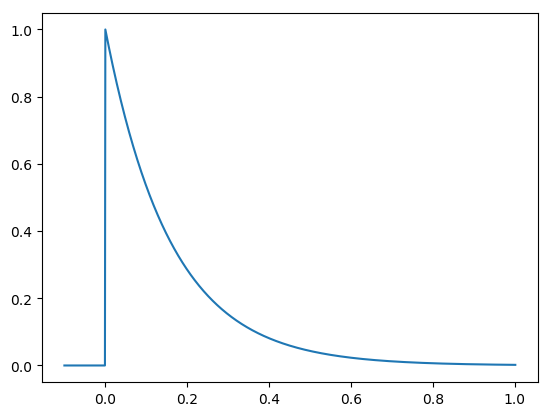

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32ae52ed0>

In [9]:
plot(_t1, r1)

In [21]:
resp = exp(- t ./ tau)
normalize!(resp, 1)

60000-element Array{Float64,1}:
 0.00626349  
 0.00622426  
 0.00618527  
 0.00614653  
 0.00610803  
 0.00606977  
 0.00603175  
 0.00599398  
 0.00595643  
 0.00591912  
 0.00588205  
 0.00584521  
 0.0058086   
 ⋮           
 1.27174e-166
 1.26378e-166
 1.25586e-166
 1.24799e-166
 1.24018e-166
 1.23241e-166
 1.22469e-166
 1.21702e-166
 1.2094e-166 
 1.20182e-166
 1.19429e-166
 1.18681e-166

In [22]:
xn = x - mean(x)

60000-element Array{Float64,1}:
 0.00340015
 0.00328472
 0.00316522
 0.00304183
 0.00291477
 0.00278424
 0.00265047
 0.00251368
 0.00237413
 0.0022321 
 0.00208787
 0.00194173
 0.00179393
 ⋮         
 0.00682119
 0.00661321
 0.00641102
 0.00621457
 0.00602377
 0.0058385 
 0.00565862
 0.00548394
 0.00531429
 0.00514943
 0.00498916
 0.00483322

In [23]:
A = toeplitz(reverse(resp), length(xn), length(xn) + length(resp) - 1)

60000-element Array{Float64,1}:
 1.18681e-166
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 ⋮           
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         

119999-element Array{Float64,1}:
 1.18681e-166
 1.19429e-166
 1.20182e-166
 1.2094e-166 
 1.21702e-166
 1.22469e-166
 1.23241e-166
 1.24018e-166
 1.24799e-166
 1.25586e-166
 1.26378e-166
 1.27174e-166
 1.27976e-166
 ⋮           
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         
 0.0         

60000×119999 ToeplitzMatrices.Toeplitz{Float64,Complex{Float64}}:
 1.18681e-166  1.19429e-166  …  0.0         0.0         0.0       
 0.0           1.18681e-166     0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 0.0           0.0           …  0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 0.0           0.0           …  0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 0.0           0.0              0.0         0.0         0.0       
 ⋮                           ⋱                                 

In [24]:
Act = ctrans(A)

119999×60000 ToeplitzMatrices.Toeplitz{Float64,Complex{Float64}}:
 1.18681e-166  0.0           …  0.0         0.0         0.0       
 1.19429e-166  1.18681e-166     0.0         0.0         0.0       
 1.20182e-166  1.19429e-166     0.0         0.0         0.0       
 1.2094e-166   1.20182e-166     0.0         0.0         0.0       
 1.21702e-166  1.2094e-166      0.0         0.0         0.0       
 1.22469e-166  1.21702e-166  …  0.0         0.0         0.0       
 1.23241e-166  1.22469e-166     0.0         0.0         0.0       
 1.24018e-166  1.23241e-166     0.0         0.0         0.0       
 1.24799e-166  1.24018e-166     0.0         0.0         0.0       
 1.25586e-166  1.24799e-166     0.0         0.0         0.0       
 1.26378e-166  1.25586e-166  …  0.0         0.0         0.0       
 1.27174e-166  1.26378e-166     0.0         0.0         0.0       
 1.27976e-166  1.27174e-166     0.0         0.0         0.0       
 ⋮                           ⋱                                 

In [25]:
ind = sortperm(Act * x, rev=true)

119999-element Array{Int64,1}:
  63879
  63878
  63880
  63877
  63881
  63876
  63882
  63875
  63883
  63874
  63884
  63873
  63885
      ⋮
 116997
 117008
 116998
 117007
 116999
 117006
 117000
 117005
 117001
 117004
 117002
 117003

In [28]:
Aapprox_dense = A[:, [4042, ind[492], ind[1354]]]

60000×3 Array{Float64,2}:
 1.26262e-155  0.0          0.0        
 1.25471e-155  0.0          0.0        
 1.24685e-155  0.0          0.0        
 1.23904e-155  0.0          0.0        
 1.23128e-155  0.0          0.0        
 1.22357e-155  0.0          0.0        
 1.21591e-155  0.0          0.0        
 1.20829e-155  0.0          0.0        
 1.20072e-155  0.0          0.0        
 1.1932e-155   0.0          0.0        
 1.18573e-155  0.0          0.0        
 1.1783e-155   0.0          0.0        
 1.17092e-155  0.0          0.0        
 ⋮                                     
 0.0           7.92689e-19  1.01619e-17
 0.0           7.87724e-19  1.00983e-17
 0.0           7.8279e-19   1.0035e-17 
 0.0           7.77887e-19  9.97218e-18
 0.0           7.73015e-19  9.90972e-18
 0.0           7.68173e-19  9.84765e-18
 0.0           7.63362e-19  9.78597e-18
 0.0           7.5858e-19   9.72468e-18
 0.0           7.53829e-19  9.66377e-18
 0.0           7.49108e-19  9.60324e-18
 0.0          

In [29]:
Aapprox_sparse = sparse(Aapprox_dense)

60000×3 sparse matrix with 15312 Float64 nonzero entries:
	[1    ,     1]  =  1.26262e-155
	[2    ,     1]  =  1.25471e-155
	[3    ,     1]  =  1.24685e-155
	[4    ,     1]  =  1.23904e-155
	[5    ,     1]  =  1.23128e-155
	[6    ,     1]  =  1.22357e-155
	[7    ,     1]  =  1.21591e-155
	[8    ,     1]  =  1.20829e-155
	[9    ,     1]  =  1.20072e-155
	[10   ,     1]  =  1.1932e-155
	⋮
	[59990,     3]  =  1.00983e-17
	[59991,     3]  =  1.0035e-17
	[59992,     3]  =  9.97218e-18
	[59993,     3]  =  9.90972e-18
	[59994,     3]  =  9.84765e-18
	[59995,     3]  =  9.78597e-18
	[59996,     3]  =  9.72468e-18
	[59997,     3]  =  9.66377e-18
	[59998,     3]  =  9.60324e-18
	[59999,     3]  =  9.54309e-18
	[60000,     3]  =  9.48332e-18

In [30]:
using BenchmarkTools

In [31]:
@benchmark Aapprox_dense' * Aapprox_dense

BenchmarkTools.Trial: 
  memory estimate:  192.00 bytes
  allocs estimate:  2
  --------------
  minimum time:     536.292 μs (0.00% GC)
  median time:      554.154 μs (0.00% GC)
  mean time:        574.150 μs (0.00% GC)
  maximum time:     983.157 μs (0.00% GC)
  --------------
  samples:          8698
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [32]:
@benchmark inv(Aapprox_dense' * Aapprox_dense)  * (Aapprox_dense' * x)

BenchmarkTools.Trial: 
  memory estimate:  2.77 kb
  allocs estimate:  17
  --------------
  minimum time:     632.915 μs (0.00% GC)
  median time:      663.765 μs (0.00% GC)
  mean time:        683.615 μs (0.00% GC)
  maximum time:     1.121 ms (0.00% GC)
  --------------
  samples:          7301
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [36]:
x_approx = inv(full(Aapprox_sparse' * Aapprox_sparse))  * (Aapprox_sparse' * x)

3-element Array{Float64,1}:
 -5.92219e153
 68.2443     
 18.0479     

In [37]:
x - Aapprox_sparse * x_approx

60000-element Array{Float64,1}:
  0.039946 
  0.0393623
  0.0387773
  0.0381914
  0.0376048
  0.0370175
  0.0364299
  0.0358421
  0.0352543
  0.0346669
  0.0340801
  0.0334941
  0.0329092
  ⋮        
 -0.0314076
 -0.0316156
 -0.0318178
 -0.0320142
 -0.032205 
 -0.0323903
 -0.0325702
 -0.0327449
 -0.0329145
 -0.0330794
 -0.0332397
 -0.0333956

In [38]:
sx = sparsevec(zeros(61001))

Sparse vector of length 61001 with 0 Float64 nonzero entries:


In [39]:
y = xn
k = 1
inds = Vector{Int}()
r = copy(y)
A_ct = ctrans(A)

119999×60000 ToeplitzMatrices.Toeplitz{Float64,Complex{Float64}}:
 1.18681e-166  0.0           …  0.0         0.0         0.0       
 1.19429e-166  1.18681e-166     0.0         0.0         0.0       
 1.20182e-166  1.19429e-166     0.0         0.0         0.0       
 1.2094e-166   1.20182e-166     0.0         0.0         0.0       
 1.21702e-166  1.2094e-166      0.0         0.0         0.0       
 1.22469e-166  1.21702e-166  …  0.0         0.0         0.0       
 1.23241e-166  1.22469e-166     0.0         0.0         0.0       
 1.24018e-166  1.23241e-166     0.0         0.0         0.0       
 1.24799e-166  1.24018e-166     0.0         0.0         0.0       
 1.25586e-166  1.24799e-166     0.0         0.0         0.0       
 1.26378e-166  1.25586e-166  …  0.0         0.0         0.0       
 1.27174e-166  1.26378e-166     0.0         0.0         0.0       
 1.27976e-166  1.27174e-166     0.0         0.0         0.0       
 ⋮                           ⋱                                 

In [40]:
A_ct * r

119999-element Array{Float64,1}:
 -5.68441e-18
 -3.158e-18  
  7.57921e-18
  9.78981e-18
  1.92638e-17
  6.00021e-18
 -1.7369e-17 
 -1.2632e-18 
  1.95796e-17
 -1.8948e-18 
  4.737e-18  
  3.158e-19  
 -5.68441e-18
  ⋮          
  0.000420704
  0.000380362
  0.000341077
  0.000302818
  0.000265557
  0.000229263
  0.000193908
  0.000159464
  0.000125904
  9.3202e-5  
  6.13327e-5 
  3.02728e-5 

In [41]:
x = sparsevec(Vector{Int}(),Vector{Float64}(), size(A)[2])

Sparse vector of length 119999 with 0 Float64 nonzero entries:


In [42]:
x[3] = 2.0

2.0

In [43]:
y = xn
k = 50
x = sparsevec(Vector{Int}(),Vector{Float64}(), size(A)[2])
r = copy(y)
A_ct = ctrans(A)
for j = 1:k
    rX = abs(A_ct * r)
    sortedinds = sortperm(rX, rev=true)
    for ind_ in sortedinds
        if !(ind_ in x.nzind)
            println(ind_)
            x[ind_] = 1.0
            break
        end
    end
    Aapprox = sparse(A[:, x.nzind])
    # Somehow I was writing the wrong number on top!
    x.nzval[:] = inv(full(Aapprox' * Aapprox)) * (Aapprox' * y)
    r[:] = y - Aapprox * x.nzval
end

117003
63879
114116
117377
114331
117608
116972
114025
117032
63914
63846
114579
114213
117870
117291
117491
114824
115321
114441
117727
115821
116989
63895
63864
116313
117016
114069
118161
115059
64178
70823
115557
87317
114695
106197
107310
117113
114164
106604
116646
114271
87792
79788
86905
117431
89798
116041
107920
117333
78561


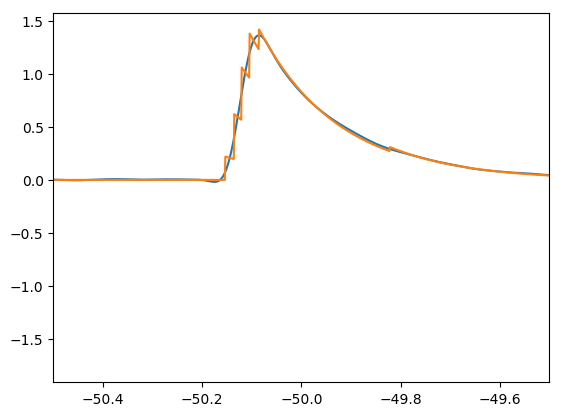

(-50.5,-49.5)

In [44]:
plot(t, xn)
plot(t, A * full(x))
xlim(-50.5, -49.5)

In [45]:
t

60000-element Array{Float64,1}:
 -53.9995
 -53.9985
 -53.9975
 -53.9965
 -53.9955
 -53.9945
 -53.9935
 -53.9925
 -53.9915
 -53.9905
 -53.9895
 -53.9885
 -53.9875
   ⋮     
   5.9885
   5.9895
   5.9905
   5.9915
   5.9925
   5.9935
   5.9945
   5.9955
   5.9965
   5.9975
   5.9985
   5.9995

In [47]:
# plot(t[x.nzind]*1e3, x.nzval, )
# xlim(-49175, -49075)

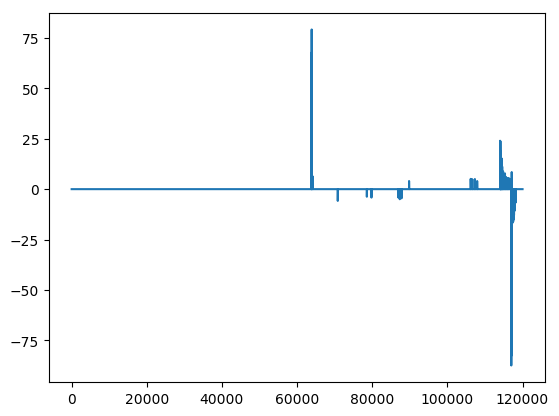

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32fa98490>

In [48]:
plot(x)

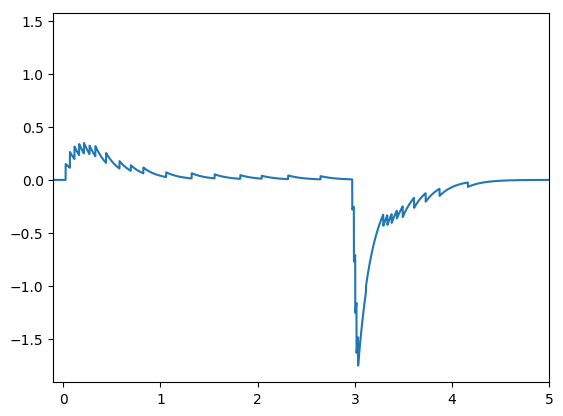

(-0.1,5)

In [53]:
plot(t, A * full(x))
xlim(-0.1, 5)

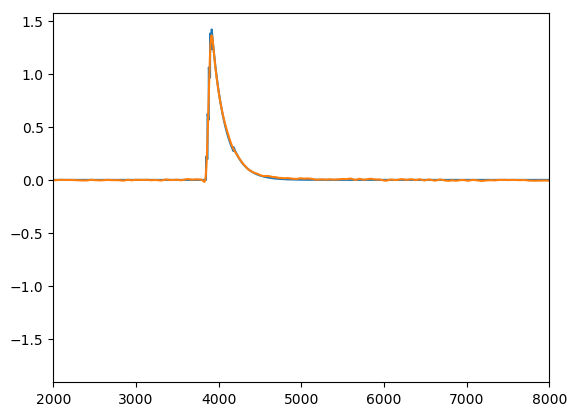

(2000,8000)

In [54]:
plot(xn-r)
plot(xn)
xlim(2000, 8000)

In [55]:
function sparse_sum(x)
    vals = cumsum(x.nzval)
    inds = x.nzind
    return inds, vals
end

sparse_sum (generic function with 1 method)

In [56]:
xi, xsum = sparse_sum(x)

([63846,63864,63879,63895,63914,64178,70823,78561,79788,86905  …  117113,117291,117333,117377,117431,117491,117608,117727,117870,118161],[35.0437,102.816,182.075,249.476,280.382,286.665,280.829,277.062,272.87,268.754  …  167.757,150.933,136.178,122.72,110.89,94.6368,79.4218,66.5237,55.7497,49.0896])

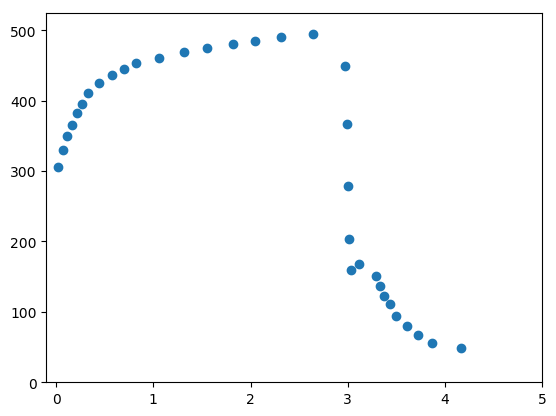

(-0.1,5)

In [65]:
ti = [t[i-length(resp)] for i in xi]
plot(ti, xsum, "o")
ylim(0, 525)
xlim(-0.1, 5)

In [163]:
x.nzval[:] = 

2-element Array{Float64,1}:
  203.751
 -239.242

In [103]:
xr = omp_sparse(A, xn, 2)

LoadError: LoadError: InterruptException:
while loading In[103], in expression starting on line 1

In [310]:
plot(t, x)
plot(t, xr[501:end-501]/150)

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension, but have shapes (60000,) and (61001,)',)
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3158, in plot
    ret = ax.plot(*args, **kwargs)
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py", line 1857, in inner
    return func(ax, *args, **kwargs)
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1383, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 403, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 381, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 240, in _xy_from_xy
    "have shapes {} and {}".format(x.shape, y.shape))

while loading In[310], in expression starting on line 1